# DELORO Yonatan
# Machine learning, applications. Tp1: Régression linéaire

Pour le 25 mars 2017

Note : pour les données de "housing.csv", on associera les dimensions [crim zone indus chas nox room age empldist radiushighway taxproperty teacherratio blackprct lowerstatus] aux entiers de 1 à 13 dans cet ordre, dans les graphiques ainsi que dans les commentaires lorsque l'interprétation n'est pas intéressante.

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import sklearn.linear_model as skl

import pdb
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv,hsv_to_rgb
from time import sleep

plt.rcParams['figure.figsize'][0] = 12.

# 1. Données artificielles et réelles


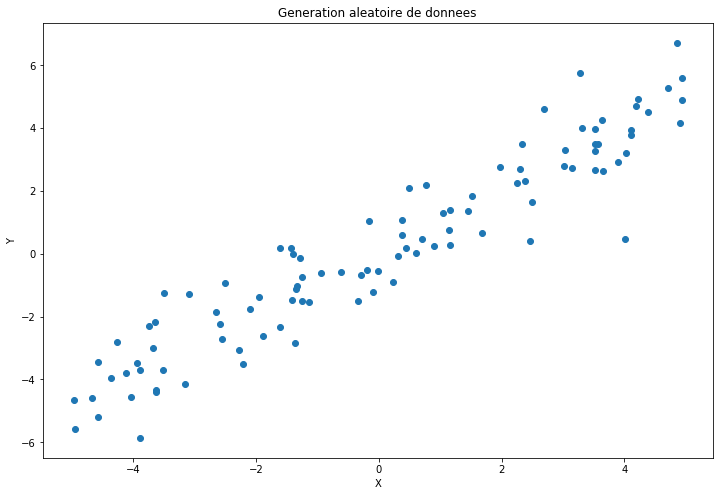

In [139]:
def gen_linear(a,b,eps,nbex):
    # engendre nbex points (x,y) iid suivant y=ax+b+e où e bruit gaussien de variance eps et où x est
    # tiré selon une loi uniforme sur [-5,5] 
    X=np.random.rand(nbex,1)
    X=10*X-5
    Y=a*X+b+eps*np.random.randn(nbex,1)
    return X,np.reshape(Y,(-1,1))

def question_111_112():
    X,Y=gen_linear(1,0,1,100)
    plt.figure()
    plt.scatter(X,Y)
    plt.title("Generation aleatoire de donnees")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
question_111_112()

1.1.2. On obtient bien 100 points générés dont les abcisses, stockées dans X, se situent aléatoirement dans [-5,5] et dont les ordonnées, stockées dans Y, se répartissent autour de la droite d'équation y=x (a=1, b=0) , perturbées par un bruit gaussien centré de variance 1. 

In [140]:
def gen_linear2(a,b,eps,nbex):
    # généralisation de gen_linear où a est une liste de coefficients (les x sont donc de dimension len(a)) 
    a2=np.array(a)
    a2=np.reshape(a2,(np.shape(a2)[0],1))
    X=np.random.rand(nbex,len(a))
    X=10*X-5
    Y=np.dot(X,a2)
    Y=Y+b+eps*np.random.randn(nbex,1)
    return X,np.reshape(Y,(-1,1))

def question_113():
    #test pour la génération de 10 données suivant Y=[1,1,1]X+5 + e ou e bruit gaussien de variance 1. 
    X,Y=gen_linear2([1,1,1],5,1,10)
    print("X = ")
    print(X)
    print("Y = ")
    print(Y)
    
question_113()

X = 
[[ 4.57988024  4.13368075 -1.94560189]
 [-0.96222496 -4.96102122  2.4018185 ]
 [ 2.10892861  3.12675314 -0.31778987]
 [ 4.17900873 -1.34489614 -4.00923389]
 [-4.84063649 -1.27994671 -3.85360448]
 [-4.88829743  3.4567153  -4.21066823]
 [-2.34990942  4.78616873  3.85617655]
 [ 0.04444361  3.24220807  4.09082352]
 [-0.3981214   4.45018546 -3.1040485 ]
 [-2.60809481  1.56936452 -2.46403704]]
Y = 
[[ 12.24378503]
 [  1.62942206]
 [  9.63313829]
 [  4.45809231]
 [ -5.25332048]
 [  1.06911138]
 [ 11.24993524]
 [ 11.52885099]
 [  6.64302679]
 [  2.44615259]]


1.1.3. Si a est maintenant une liste de coefficients, les données d'entrée X à générer sont donc de dimension égale à la longueur de a, et on a Y=b+a.X

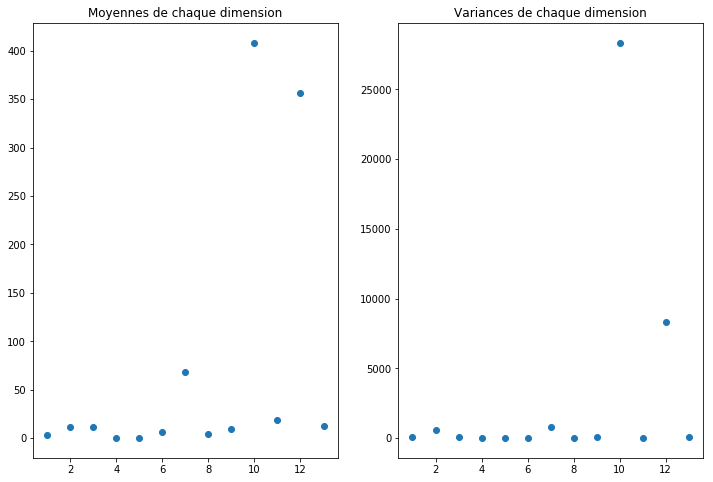

In [141]:
def read_file ( fn ):
    with open ( fn ) as f :
         names = f . readline ()
         X = np . array ([[ float ( x ) for x in l . strip (). split (" ")] for l in f . readlines ()])
    return X [: ,: -1] , X [: , -1]. reshape ( -1)

def question_121(affiche):
    X,Y = read_file("housing.csv")
    lig,col=np.shape(X)
    moy=[] 
    var=[]
    for i in range(col):
        valeurs=np.reshape(X[:,i],(lig,1))
        moy.append(np.mean(valeurs))
        var.append(np.var(valeurs)) 
    if affiche:
        plt.figure()
        plt.subplot(1,2,1)
        plt.scatter(list(range(1,col+1)),moy)
        plt.title("Moyennes de chaque dimension")
        plt.subplot(1,2,2)
        plt.scatter(list(range(1,col+1)),var)
        plt.title("Variances de chaque dimension")
        plt.show()
    else:
        return moy,var

question_121(True)

1.2.1 Les moyennes de la dimension 7,10,12 sont respectivement plus de 5, 35 et 40 fois plus élevées que celles des autres dimensions, autour de la dizaine.
Les variances des dimensions 9 et 12 sont respectivement plus de 15 et 55 fois plus élevées que celles des autres dimensions, inférieures à 500.

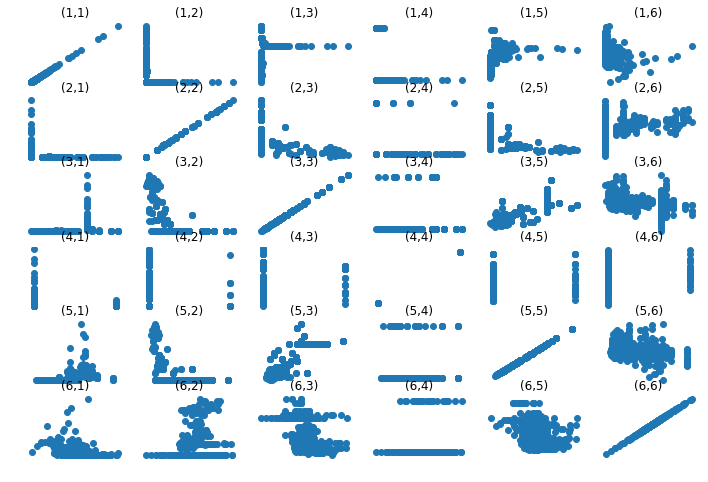

Nuages de points 2D (dimension1, dimension2). En abcisse, dimension 1 (de 1 à 6). En ordonnée, dimension 2 (de 1 à 6)
Rappel : [crim zone indus chas nox room] correspondent aux dimensions 1 à 6.


In [142]:
def question_122():
    X,Y = read_file("housing.csv")
    lig,col=np.shape(X)
    plt . figure ()
    k=0
    for j1 in range(6):
        for j2 in range(6):
            k+=1
            plt.subplot(6,6,k)
            plt.scatter(X[:,j1],X[:,j2])
            plt.title("("+str(j1+1)+","+str(j2+1)+")") 
            plt.axis('off')
    plt.show()
    print("Nuages de points 2D (dimension1, dimension2). En abcisse, dimension 1 (de 1 à 6). En ordonnée, dimension 2 (de 1 à 6)")
    print("Rappel : [crim zone indus chas nox room] correspondent aux dimensions 1 à 6.")
question_122()

1.2.2. En représentant les nuages des points en ne conservant à chaque fois que deux dimensions, il semble par exemple que les variables 1 et 2 soient négativement corrélées: lorsque "crim" est très faible, "zone" est élevée et dès que "crim" augmente un peu ,"zone" est quasi-nulle. En revanche, il apparait par exemple que les dimensions 3 et 5 sont positivement corrélées : "nox" semble augmenter avec "indus".

# 2. Régression linéaire

2.1. Préambule :

On a : $f_w(x)=\langle W,x \rangle$ où 
$W=\left( \begin{array}{c}
W_0 \\
W_1 \\
\vdots \\
W_d
\end{array} \right)$ 
et 
$x=\left( \begin{array}{c}
1 \\
x_1 \\
\vdots \\
x_d
\end{array} \right)$ 

Ainsi le résultat de $f_w$ sur toute la base d'apprentissage de taille $n$ $X=\left( \begin{array}{r}
x^0 \\
x^1 \\
\vdots \\
x^n
\end{array} \right)=\begin{pmatrix}
        x^0_1 & ... & x^0_d \\
        x^1_1 & ... & x^1_d \\
        \vdots & \ddots & \vdots \\
        x^n_1 & ... & x^n_d \\
\end{pmatrix}$


est donc donné par : $Y=\widetilde{X}W, ~~~~ 
\widetilde{X}=\begin{pmatrix}
       1 & x^0_1 & ... & x^0_d \\
       1 & x^1_1 & ... & x^1_d \\
       \vdots & \vdots & \ddots & \vdots \\
       1 & x^n_1 & ... & x^n_d \\
\end{pmatrix}$

L'erreur des moindres carrés s'écrit pour une base d'apprentissage $X,Y$ donnée : 
$$l(Y,f_W(X))=g_{X,Y}(W)=\frac{1}{2n} \|f_W(X)-Y\|^2 = \frac{1}{2n} \|\widetilde{X}W-Y\|^2$$

L'estimateur des moindres carrés est le vecteur $W$ qui minimise cette erreur. L'erreur à minimiser en $W$ étant convexe, elle atteint ses minima en des points d'annulation de son gradient.

En développant :
$$\begin{array}{rcl}
n \times g_{X,Y}(W) & = & \frac{1}{2} \langle \widetilde{X}W-Y,\widetilde{X}W-Y \rangle \\
            & = & \frac{1}{2} (W^T\widetilde{X}^T\widetilde{X}W+Y^TY-W^T\widetilde{X}^TY-Y^T\widetilde{X}W) \\
            & = & \frac{1}{2} W^T\widetilde{X}^T\widetilde{X}W + \frac{1}{2}Y^TY - Y^T\widetilde{X}W \\
\end{array}$$

On en déduit par conséquent :
$$\begin{array}{rcl}
n \times \nabla g_{X,Y}(W) & = & \frac{1}{2} (\widetilde{X}^T\widetilde{X}+(\widetilde{X}^T\widetilde{X})^T)W - Y^T\widetilde{X} \\
& = & \widetilde{X}^T\widetilde{X}W - Y^T\widetilde{X}
\end{array}$$ 

Ainsi, si  $\widetilde{X}^T\widetilde{X}$ est inversible, l'estimateur des moindres carrés $\widehat{w}$ existe et est unique :
$$\widehat{w}=(\widetilde{X}^T\widetilde{X})^{-1}\widetilde{X}^TY$$

In [143]:
def predict(w,X): 
    # revoie sous la forme d'un vecteur la prédiction de X avec les poids de w
    w2=np.reshape(np.array(w),(len(w),1))
    result=np.dot(X,w2[1:,:])+w2[0,:]
    return result.flatten()

def mse(yhat,y):
    # calcule l'erreur au sens des moindres carrés entre les vecteurs y et yhat
    (n,)=np.shape(y.flatten())
    diff=y.flatten()-yhat.flatten()
    return 1/(2*n)*np.mean(diff*diff)

def regress(X,Y):
    # renvoie sous la forme d'un vecteur la solution w apprise avec la base d'apprentissage (X,Y)
    Y=np.reshape(Y,(-1,1))
    (n,p)=np.shape(X)
    col_id=np.reshape((np.ones(n)),(n,1)) # vecteur colonne de 1 (pour prendre en compte le terme 
    # constant b qui contribue à Y et qui est indépendant de X)
    Xd=np.concatenate((col_id,X),axis=1)  # matrice de "design" 
    Xdt=np.transpose(Xd) 
    w=np.dot(np.linalg.pinv(np.dot(Xdt,Xd)),np.dot(Xdt,Y))
    w=np.reshape(w,(p+1,1))
    return w.flatten()

def question_21():
    # vérifions que la fonction regress renvoit le bon w pour des données non bruités (X,Y) suivant la
    # relation Y = 1 + 4*X[0] + 5*X[1]
    X_train=np.array([[1,2],[2,3],[4,6]])
    w_th=np.array([1,4,5])
    Y_train=predict(w_th,X_train)
    w_learned=regress(X_train,Y_train)
    error_train=mse(Y_train,predict(w_learned,X_train))
    print("w appris : "+str(w_learned))
    print("erreur des moindres carrés : "+str(error_train))
    
question_21()

w appris : [ 1.  4.  5.]
erreur des moindres carrés : 1.51649778968e-24


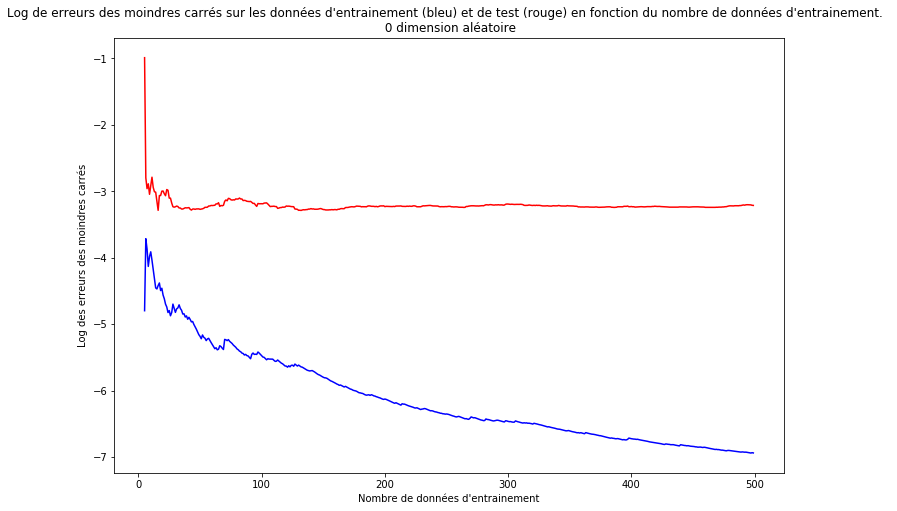

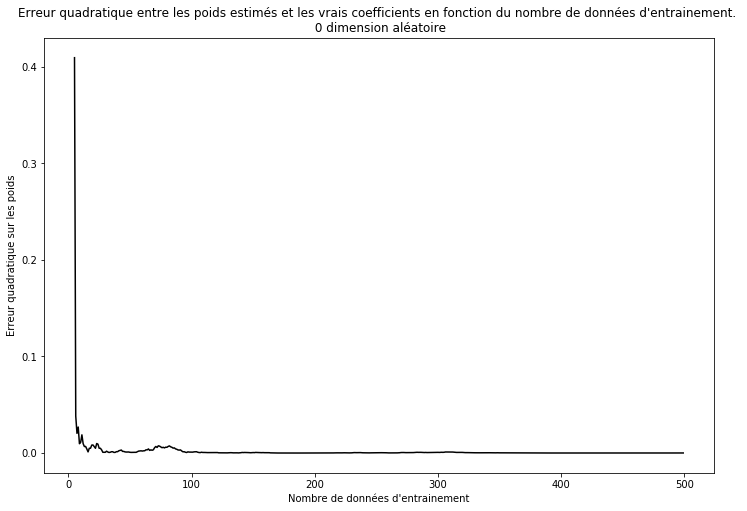

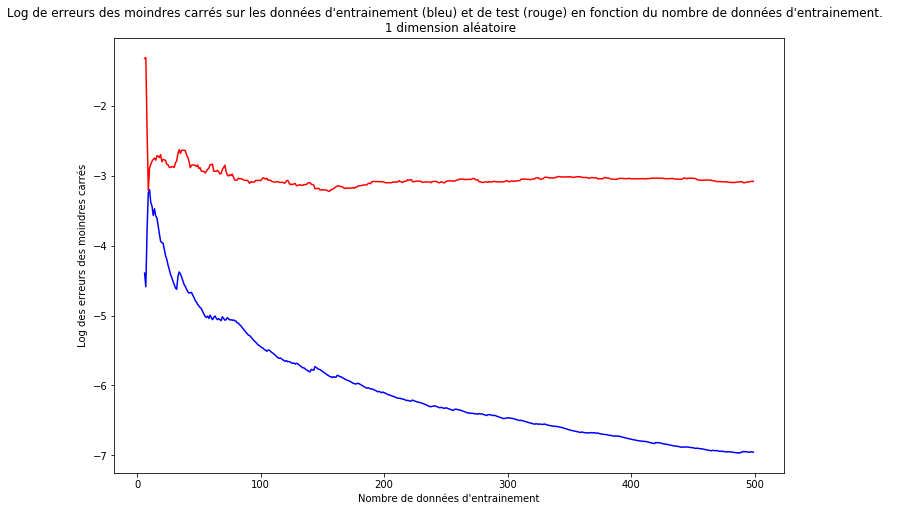

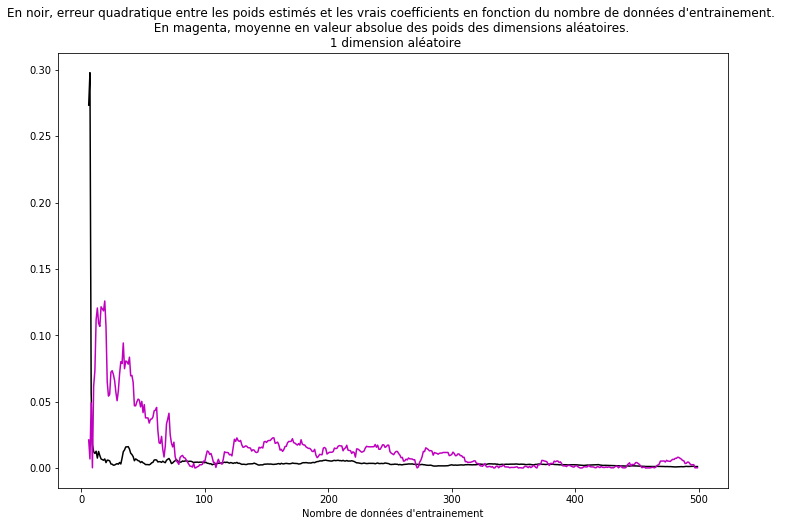

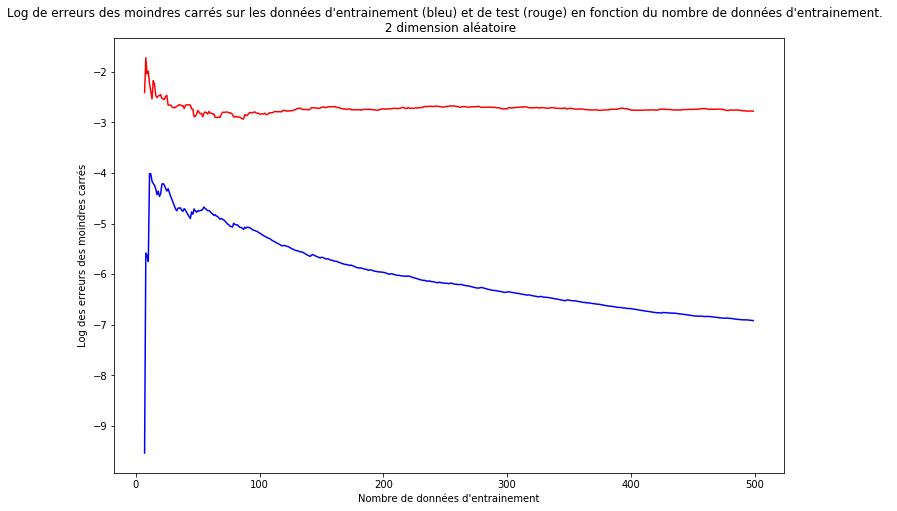

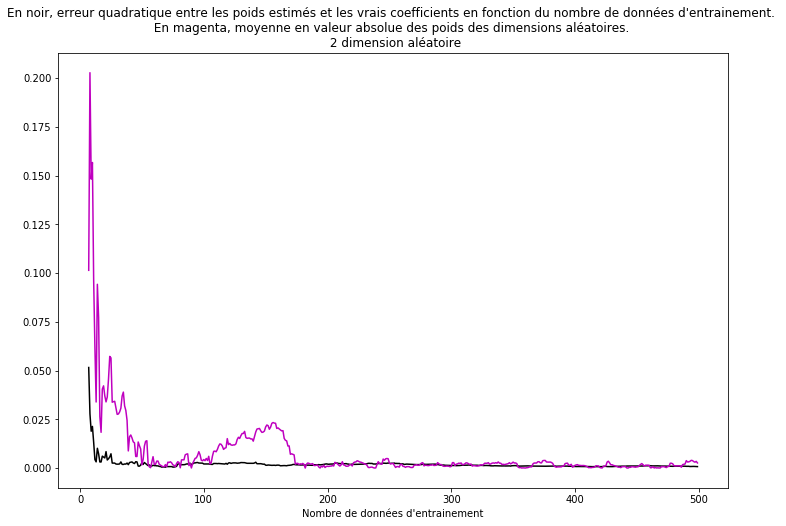

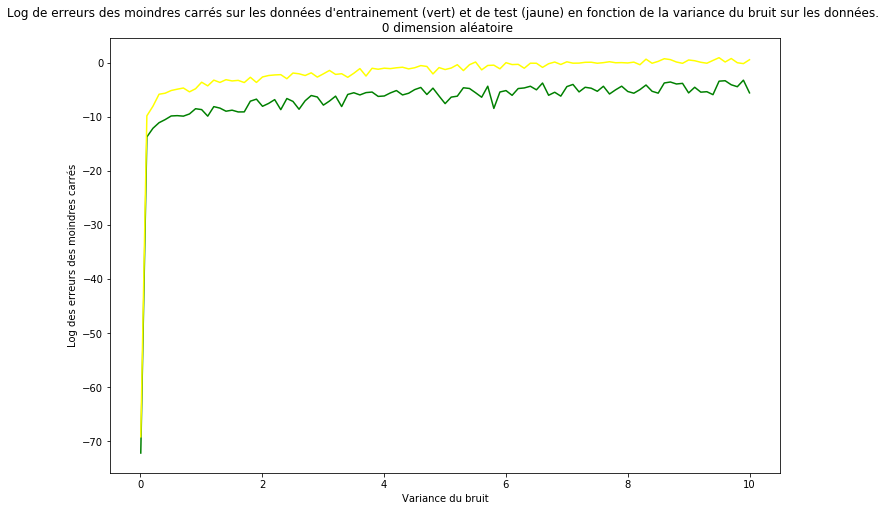

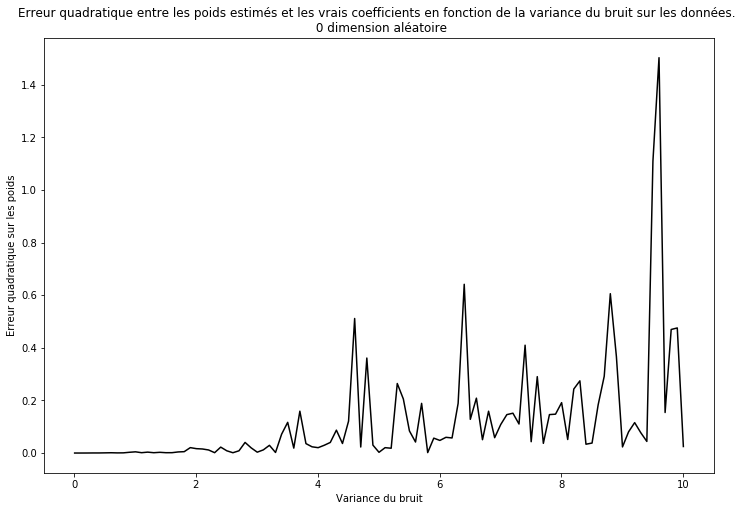

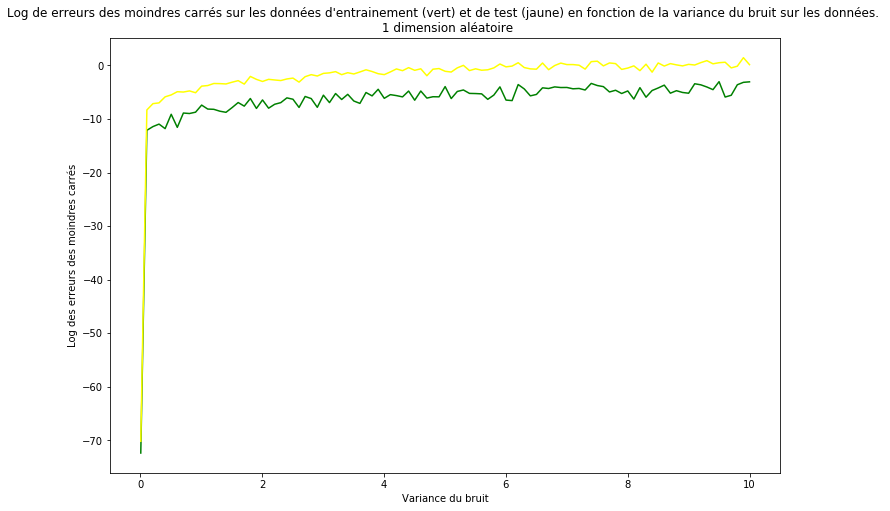

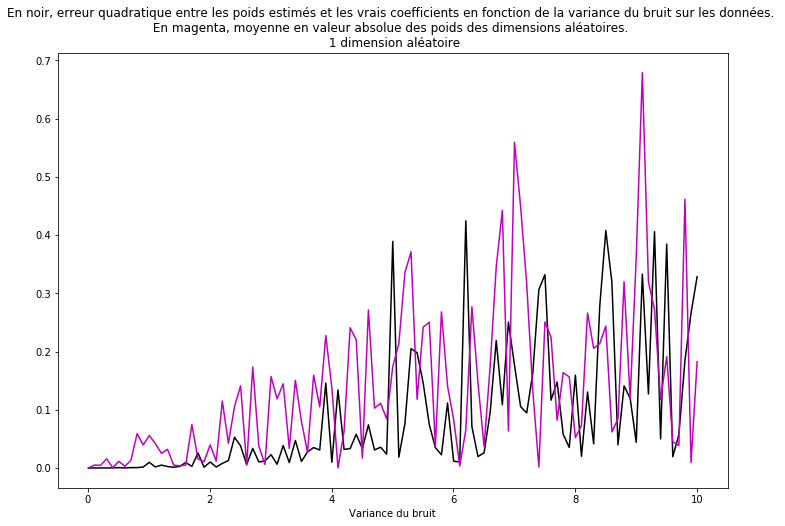

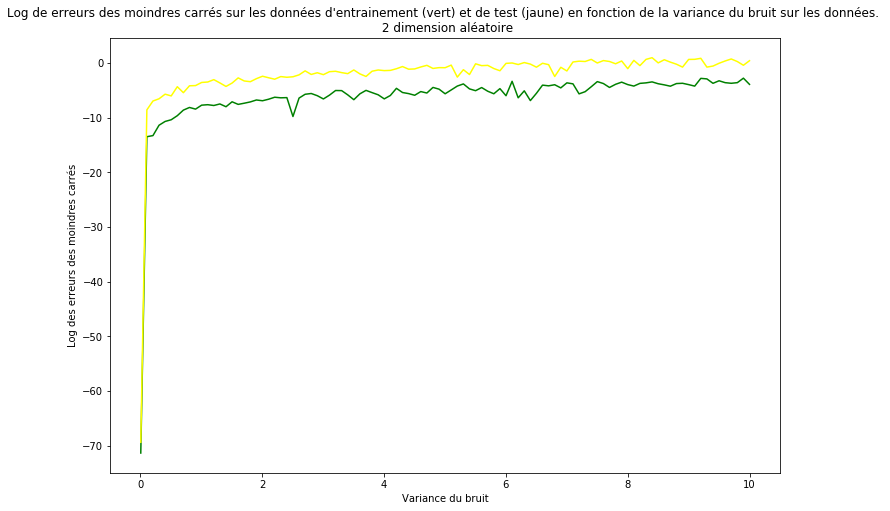

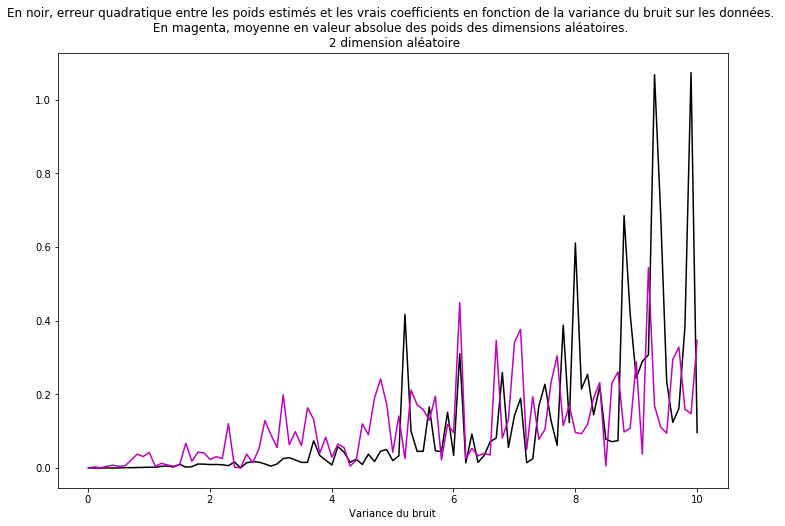

In [144]:
def question_22():
    a=[1,1,1]
    b=5
    size_test_set=10

    #INFLUENCE DU NOMBRE DE DONNEES D'ENTRAINEMENT :  
    noise=1. #bruit identique pour les expériences (et bruit_train=bruit_test)
    #on observe les erreurs pour un nombre de données variant du minimum requis+1 jusqu'à  size_trainset_max
    size_trainset_max=500
    size_trainset_impact(size_trainset_max,a,b,noise,size_test_set,0)
    #puis ajoutant à X_train et à X_test une dimension aléatoire
    size_trainset_impact(size_trainset_max,a,b,noise,size_test_set,1) 
    #puis ajoutant à X_train et à X_test 2 dimensions aléatoires
    size_trainset_impact(size_trainset_max,a,b,noise,size_test_set,2) 
    
    #INFLUENCE DU BRUIT SUR LES DONNEES :
    size_train_set=100 #nombre de données d'entrainement identique pour les expériences (supérieur à len(a)+1+nb_dim_alea)
    #on observe les erreurs pour nb_values valeurs de variances du bruit entre noise_min et noise_max
    noise_min=0.01 
    noise_max=10
    nb_values=100
    noise_impact(noise_min,noise_max,nb_values,a,b,size_train_set,size_test_set,0)
    #puis ajoutant à X_train et à X_test une dimension aléatoire
    noise_impact(noise_min,noise_max,nb_values,a,b,size_train_set,size_test_set,1) 
    #puis ajoutant à X_train et à X_test 2 dimensions aléatoires
    noise_impact(noise_min,noise_max,nb_values,a,b,size_train_set,size_test_set,2) 
    
def size_trainset_impact(size_trainset_max,a,b,eps,size_testset,nb_dim_alea):    
    #Montre l'impact du nombre de données d'entrainements sur l'erreur sur les poids prédits, sur les 
    #données d'entrainements, et sur l'erreur sur les données de tests
    #en calculant celles-ci pour un nombre allant du minimum requis +1 à size_dataset_max
     #a,b sont les coefficients à prédire 
     #eps est la variance du bruit identique pour toutes les expériences
     #n_dim_alea est le nombre de dimensions aléatoires de X_train et X_test (qui n'influent pas sur Y)
     #size_testset est la taille de l'ensemble des données de test
     
    #En résumé, si nb_dim_alea > 0 et si les dimensions aléatoires de X sont stockés en dernier, 
    #Y = a.X[0:-nb_dim alea] + b + e où e bruit gaussien de variance eps
        
    w_th=np.array([b]+a+[0]*nb_dim_alea)
    N=(len(a)+1+nb_dim_alea)+1 
    #Il faut au minimum un nombre de données égal au nombre de coefficients à prédire ! 
    #soit à len(a)+1+nb_dim_alea (cf.préambule). 
    size_trainset=list(range(N,size_trainset_max))

    #On va calculer w avec un nombre N croissant de données d'entrainement
    mse_train=[] #erreur des moindres carrés sur donnees d'entrainement selon N
    se_weights=[] #erreur quadratique poids estimés/vrais coeff selon N 
    mse_test=[] #erreur des moindres carrés sur données de test selon N
    if nb_dim_alea>0:
       weights_alea=[] # moyenne des poids des dimensions aléatoires selon N

    #On teste sur le même ensemble de données pour tout N
    X_test, Y_test =gen_linear2(a,b,eps,size_testset)
    X_test = np.concatenate((X_test,10*np.random.rand(size_testset,nb_dim_alea)-5),axis=1)
    
    #Calcul de w avec un nombre minimal de données d'entrainement
    X_train, Y_train =gen_linear2(a,b,eps,N)
    #Ajout des éventuelles dimensions aléatoires
    X_train = np.concatenate((X_train,10*np.random.rand(N,nb_dim_alea)-5),axis=1)
    w_learned=regress(X_train,Y_train)
  
    se_weights.append(mse(w_th,w_learned)*2*np.shape(w_th)[0])
    if nb_dim_alea>0:
       weights_alea.append(abs(np.mean(w_learned[-nb_dim_alea:])))

    mse_train.append(math.log(mse(Y_train,predict(w_learned,X_train))))
    mse_test.append(math.log(mse(Y_test,predict(w_learned,X_test))))
    

    for N in size_trainset[1:]:
        #On ajoute une donnée d'entrainement et recalcule w

        X_new, Y_new =gen_linear2(a,b,eps,1)
        #Ajout des éventuelles dimensions aléatoires à cette donnée
        X_new=np.concatenate((X_new,10*np.random.rand(1,nb_dim_alea)-5),axis=1)
        
        X_train=np.concatenate((X_train,X_new),axis=0)
        Y_train=np.concatenate((Y_train,Y_new),axis=0)

        w_learned=regress(X_train,Y_train)
        se_weights.append(mse(w_th,w_learned)*2*np.shape(w_th)[0])
        if nb_dim_alea>0:
             weights_alea.append(abs(np.mean(w_learned[-nb_dim_alea:])))

        mse_train.append(math.log(mse(Y_train,predict(w_learned,X_train))))
        mse_test.append(math.log(mse(Y_test,predict(w_learned,X_test))))
    
    plt . figure ()
    plt.xlabel("Nombre de données d'entrainement")
    plt.ylabel("Log des erreurs des moindres carrés")
    plt.plot(size_trainset,mse_train,color='blue')
    plt.plot(size_trainset,mse_test,color='red')
    plt.title("Log de erreurs des moindres carrés sur les données d'entrainement (bleu) et de test (rouge) en fonction du nombre de données d'entrainement.  \n " +str(nb_dim_alea)+ " dimension aléatoire")
    plt.show()
    plt . figure ()
    plt.xlabel("Nombre de données d'entrainement")
    plt.plot(size_trainset,se_weights, color='k')
    if nb_dim_alea==0:
       plt.ylabel("Erreur quadratique sur les poids")
       plt.title("Erreur quadratique entre les poids estimés et les vrais coefficients en fonction du nombre de données d'entrainement. \n " +str(nb_dim_alea)+ " dimension aléatoire") 
    else :
       plt.plot(size_trainset,weights_alea,color='m')
       plt.title("En noir, erreur quadratique entre les poids estimés et les vrais coefficients en fonction du nombre de données d'entrainement. \n En magenta, moyenne en valeur absolue des poids des dimensions aléatoires.  \n " +str(nb_dim_alea)+ " dimension aléatoire") 
    plt.show()


def noise_impact(noise_min,noise_max,nb_values,a,b,N,size_testset,nb_dim_alea):
    #Montre l'impact du bruit des données d'entrainements sur l'erreur sur les poids prédits, sur les 
    #données d'entrainements, et sur l'erreur sur les données de tests
    #en calculant celles-ci pour nb_values de variances du bruit entre noise_min et noise_max
    #a,b sont les coefficients à prédire 
    #N est le nombre de données d'entrainement identique pour toutes les expériences
    #n_dim_alea est le nombre de dimensions aléatoires de X_train et X_test (qui n'influent pas sur Y)
    #size_testset est la taille de l'ensemble des données de test
    
    w_th=np.array([b]+a+[0]*nb_dim_alea)
    noises=[noise_min+ k*(noise_max-noise_min)/nb_values for k in range(nb_values+1)]

    #On calcule w avec un bruit de variance eps croissante des données d'entrainement
    mse_train=[] #erreur des moindres carrés sur donnees d'entrainement selon eps
    se_weights=[] #erreur quadratique poids estimés/vrais coeff selon eps 
    mse_test=[] #erreur des moindres carrés sur données de test selon eps
    if nb_dim_alea>0:
       weights_alea=[] # moyenne des poids des dimensions aléatoires selon eps

    #D'abord avec un bruit nul
    X_train, Y_train =gen_linear2(a,b,0,N)
    #Ajout des éventuelles dimensions aléatoires
    X_train = np.concatenate((X_train,10*np.random.rand(N,nb_dim_alea)-5),axis=1)
    
    w_learned=regress(X_train,Y_train)
    se_weights.append(mse(w_th,w_learned)*2*np.shape(w_th)[0])
    if nb_dim_alea>0:
       weights_alea.append(abs(np.mean(w_learned[-nb_dim_alea:])))

    mse_train.append(math.log(mse(Y_train,predict(w_learned,X_train))))
    #On teste sur le même ensemble de données de même amplitude de bruit
    X_test, Y_test =gen_linear2(a,b,0,size_testset)
    X_test = np.concatenate((X_test,10*np.random.rand(size_testset,nb_dim_alea)-5),axis=1)
    mse_test.append(math.log(mse(Y_test,predict(w_learned,X_test))))

    for eps in noises[1:]:
          Y_train_noised = Y_train + eps*np.random.randn(N,1)
          w_learned=regress(X_train,Y_train_noised)
          mse_train.append(math.log(mse(Y_train,predict(w_learned,X_train))))
          se_weights.append(mse(w_th,w_learned)*2*np.shape(w_th)[0])
          if nb_dim_alea>0:
             weights_alea.append(abs(np.mean(w_learned[-nb_dim_alea:])))

          Y_test_noised = Y_test + eps*np.random.rand(size_testset,1)
          mse_test.append(math.log(mse(Y_test_noised,predict(w_learned,X_test))))

    plt . figure ()
    plt.plot(noises,mse_train,color='green')
    plt.plot(noises,mse_test,color='yellow')
    plt.xlabel("Variance du bruit")
    plt.ylabel("Log des erreurs des moindres carrés")
    plt.title("Log de erreurs des moindres carrés sur les données d'entrainement (vert) et de test (jaune) en fonction de la variance du bruit sur les données. \n " +str(nb_dim_alea)+ " dimension aléatoire") 
    plt.show()
    plt . figure ()
    plt.xlabel("Variance du bruit")
    plt.plot(noises,se_weights, color='k')
    if nb_dim_alea==0:
       plt.ylabel("Erreur quadratique sur les poids")
       plt.title("Erreur quadratique entre les poids estimés et les vrais coefficients en fonction de la variance du bruit sur les données. \n " +str(nb_dim_alea)+ " dimension aléatoire") 
    else :
       plt.plot(noises,weights_alea,color='m')
       plt.title("En noir, erreur quadratique entre les poids estimés et les vrais coefficients en fonction de la variance du bruit sur les données. \n En magenta, moyenne en valeur absolue des poids des dimensions aléatoires.  \n " +str(nb_dim_alea)+ " dimension aléatoire") 
    plt.show()

    
question_22()

2.2.

(i) Impact du nombre de données d'apprentissage

-> Ce que l'on trace :

Afin de mesurer l'impact du nombre de données d'entrainement utilisés pour apprendre le prédicteur, on a d'abord pris un jeu initial de données d'apprentissage (bruitées à une variance de 1.) d'une unité supérieure à la cardinalité minimale  (égale au nombre de poids de w à deviner + 1, en l'occurrence 5), et on a calculé le prédicteur appris avec ces données, l'écart quadratique entre les poids du prédicteur et les poids théoriques, l'erreur des moindres carrés sur ce jeu de données d'entrainement et l'erreur des moindres carrés sur un ensemble prédéfini de 10 données de test également bruitées à 1. 

On ajoute ensuite progressivement d'autres données d'entrainement au jeu initial (bruitées identiquement) et calcule le prédicteur et les trois mêmes erreurs associées (on garde le même jeu de données de test pour toutes les expériences).

-> Commentaires :

On observe sur la première figure tracée que lorque le nombre de données d'entrainement utilisés augmente, l'erreur quadratique entre les poids estimés et les vrais coefficients tend vers 0.

Aussi on observe qu'avec l'augmentation du nombre de données d'entrainement, l'erreur d'entrainement augmente légèrement dans un premier temps puis ne fait plus que diminuer continument pour tendre vers 0. L'augmentation de l'erreur d'entrainement au tout début doit être due à sa quasi-nullité lorsque le nombre de données d'entrainement est exactement égal au nombre de poids à deviner (la régression linéaire modélise alors parfaitement le bruit des données dans le modèle). 

Quant à elle, l'erreur de test diminue quand le nombre de données d'entrainement croit, puis elle se stabilise (ne tend pas vers 0). On observe même parfois un régime vers une cinquantaine de données d'entrainement utilisées où l'erreur de test croit légèrement avant de stagner, quand l'erreur d'entrainement continue de diminuer. Ceci correspond probablement à un phénomène de sur-apprentissage.

-> Ajout de dimensions aléatoires :

Si l'on ajoute aux données X une dimension aléatoire, c'est-à-dire une variable aléatoire qui suit une loi uniforme sur [-5,5] qui n'a pas d'influence sur Y, on observe qu'avec un nombre croissant de données d'apprentissage utilisées, la moyenne des coefficients estimés de w correspondant à ces dimensions tend vers 0 ainsi que l'erreur quadratique entre les poids estimés et les vrais coefficients. Pour des faibles nombres de données utilisées, l'estimation est évidemment plus mauvaise que sans dimension aléatoire puisque que w essaye de les intégrer dans le modèle, mais il est remarquable de constater que l'erreur décroit tout de même rapidement et passe en dessous des seuils au bout d'un nombre de données d'apprentissage du même ordre que lorsqu'il n'y a pas de dimensions aléatoires. 


(ii) Impact du bruit sur les données

-> Ce que l'on trace : 

Afin de mesurer l'impact du bruit sur les données d'apprentissage, on considère le même jeu de 100 données d'entrainements, auxquels on ajoute des bruits gaussien de variances différentes, s'étalant de 0.01 à 10. On calcule pour chacune de ces variances, l'écart quadratique entre les poids du prédicteur et les poids théroriques, l'erreur des moindres carrés sur ce jeu de données d'entrainement et celle sur une ensemble de test de 10 données bruitées de la même manière que les données d'entrainement (le jeu de données des test change donc selon les expériences)

-> Commentaires :

On observe logiquement lorque le buit augmente, l'erreur quadratique entre les poids estimés et les vrais coefficients augmente. L'erreur des moindes carrés d'entrainement et celle de test augmentent toutes deux très rapidement jusqu'à un bruit de 0.1, puis elles augmentent ensuite plus linéairement, l'erreur d'entrainement restant toujours inférieure à celle de test. 

-> Ajout de dimensions aléatoires :

Mêmes pour des données d'entrées assez fortement bruitées, l'algorithme de régression linéaire arrive à apprendre que les dimensions aléatoires de X n'ont pas d'effet sur Y, puisqu'on constate une stagnation à 0 de la moyenne des poids associéé à ces coefficients, quand dans le même temps augmente l'erreur quadratique entre les coefficients estimés et les poids théoriques : cette dernière est donc dû plus au bruit qu'à la présence de ces dimensions aléatoires.

In [145]:
def question_231():
    X,Y = read_file("housing.csv")
    lig,col=np.shape(X)
    w_learned=regress(X,Y)
    sq_error=mse(Y,predict(w_learned,X))
    print ("poids du prédicteur w : ")
    print(w_learned)
    print ("erreur des moindres carrés : ")
    print(sq_error)
    
question_231()

poids du prédicteur w : 
[  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e+00  -1.77666112e+01   3.80986521e+00   6.92224641e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]
erreur des moindres carrés : 
0.0216352086776


2.3.1. Les treize derniers poids de la liste correspondent a priori à l'influence que les différentes variables [crim zone indus chas nox room age empldist radiushighway taxproperty teacherratio blackprct lowerstatus] ont sur le prix du logement à Boston. Le premier poids correspond quant à lui au coefficent constant de la régression linéaire, et pourrait donc s'interpréter a priori comme le poids moyen sur le prix du logement de ce qui n'est pas expliqué par les autres variables.
Ainsi il semblerait, ce coefficient étant le plus important, que les variables listées n'expliqueraient pas "le plus gros" du prix du logement. Aussi la dimension 5, soit "nox", aurait l'impact le plus significatif parmi les variables présentées et aurait tendance à faire diminuer le prix. Suivraient en terme d'impact, les dimensions 4 et 6, soit "chas" et "room", pour une augmentation ce prix, et 8 soit "empldist" pour une diminution.

poids du prédicteur si l'on multiplie par 10 la dimension 5 :
[  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e+00  -1.77666112e+00   3.80986521e+00   6.92224640e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]
erreur des moindres carrées :
0.0216352086776
poids du prédicteur après pré-traitement :
[  3.14023526e+01  -7.97559751e+00   2.51998954e+01   9.65668074e-01
   1.72986639e-01  -2.38092114e-02   1.87710236e+00   5.47406034e-01
  -6.52975552e+00   2.31577025e+01  -3.49668760e+02  -4.45669078e+00
   7.74571927e+01  -2.67070420e+01]
erreur des moindres carrées :
0.0216352086776


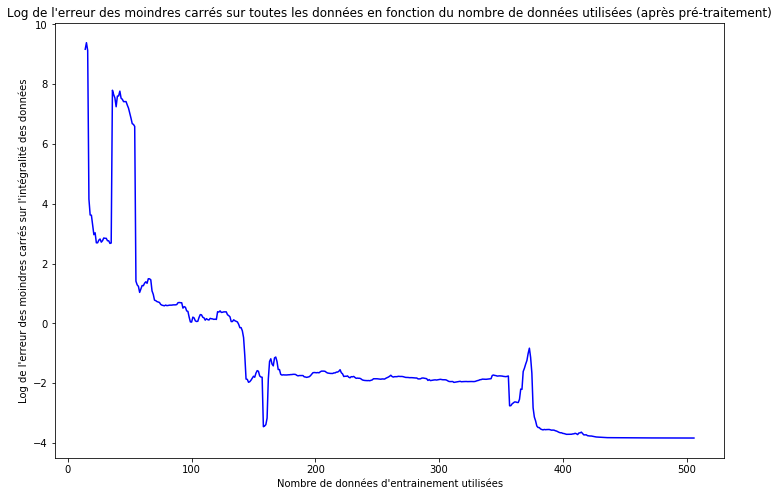

In [146]:
def preprocess(X_data):
    moy,var=question_121(False)
    for i in range(np.shape(X_data)[1]):
        X_data[:,i]=(X_data[:,i]-moy[i])/var[i]
    return X_data
    
def question_232():
    X,Y = read_file("housing.csv")
    lig,col=np.shape(X)
    
    #Si on multiplie par 10 la dimension 5 qui a le plus fort impact sur Y
    X10=X
    X10[:,4]=10*X10[:,4]
    w10=regress(X10,Y)
    error10=mse(Y,predict(w10,X10))
    print("poids du prédicteur si l'on multiplie par 10 la dimension 5 :")
    print(w10)
    print ("erreur des moindres carrées :")
    print(error10)

    #Préproccesing 
    X=preprocess(X)
    w=regress(X,Y)
    sq_error=mse(Y,predict(w,X))
    print("poids du prédicteur après pré-traitement :")
    print(w)
    print("erreur des moindres carrées :")
    print(sq_error)

   #Tracé de la courbe de l'erreur des moindres carrés en fonction du nombre de données utilisées
    nb_data=list(range(col+1,lig+1)) #nombre minimal de données utilisés 
    sq_error=[] #log des erreurs des moindres carrés fonction de nb_data
    for N in nb_data:
        w=regress(X[:N,:],Y[:N])
        sq_error.append(math.log(mse(Y,predict(w,X))))
    plt.figure()
    plt.plot(nb_data,sq_error,color='b')
    plt.xlabel("Nombre de données d'entrainement utilisées")
    plt.ylabel("Log de l'erreur des moindres carrés sur l'intégralité des données")
    plt.title("Log de l'erreur des moindres carrés sur toutes les données en fonction du nombre de données utilisées (après pré-traitement)")
    plt.show()

question_232()

2.3.2. Si l'on multiplie par 10 la dimension 5 qui avait l'impact le plus significatif sur parmi les variables présentées, on remarque que son poids perd une puissance de 10, quand les poids de toutes les autres dimensions restent identiques (les variations de 5 entre les données rendues ainsi plus importantes n'expliqueraient plus autant le prix moyen qu'avant). Aussi, l'erreur des moindres carrées reste identique. Par conséquent, il semble que l'on ne puisse pas interpréter le poids des différentes dimensions en termes d'influence avec les données brutes.

Le pré-traitement que l'on choisit d'effectuer consiste à centrer les variables  (en soustrayant leurs espérances) puis à les réduire (en les quotientant par leurs variances respectives). Par conséquent, les différentes dimensions des données de X seront donc "comparables" pour calculer leurs influences respectives sur Y : ce sera la variation d'une dimension fixée d'une donnée par rapport à une autre relativement à la variation typique, qui sera prise en compte pour l'évaluation des poids. 
Après pré-traitement, la dimension 10 "taxproperty" semble expliquer très significativement (et même plus que le "non-expliqué" par les différentes variables) le prix. Suivent en terme d'impact les dimensions 2 "zone",9 "radiushighway",et 12 "blackprct" qui tendent à l'inverse à diminuer le prix, et la dimension 13 "lowerstatus" qui tend à l'augmenter. Ces corrélations semblent plus réalistes que celles obtenues sans prétraitement.

Si on trace l'erreur des moindres carrées calculée sur l'intégralité des données, en fonction du nombre de données d'apprentissage utilisée, on observe qu'elle diminue, certes par palliers, et avec certaines augmentations soudaines. 

2.3.3 (début) Toutefois, on ne peut pas avoir confiance en cette estimation de l'erreur des moindres carrées puisque notre ensemble de validation ou de test comprend les données que l'on a utilisées pour l'apprentissage : quand on a utilisé 490 données pour l'apprentissage sur les 500, il est évident que l'erreur va être globalement faible, mais cette valeur cache probablement une inégalité certaine entre la minuscule erreur sur les 490 données d'entrainement et celle probablement beaucoup plus importante sur les 10 données restantes,à cause d'une forme de sur-apprentissage.

erreur de test pour 450 données d'entrainement:
0.13137722917605074


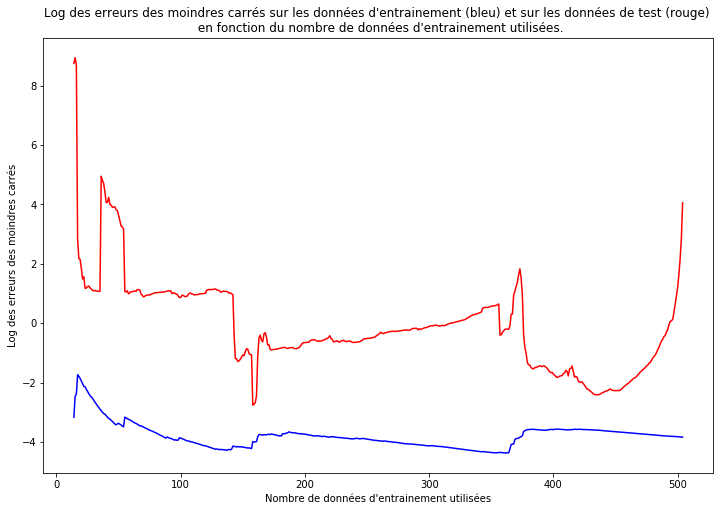

In [147]:
def question_233():
    X,Y = read_file("housing.csv")
    lig,col=np.shape(X)
    X=preprocess(X)
    size_train=list(range(col+1,lig-1)) #il faut au moins col+1 données d'apprentissage
    mse_train=[] #erreur des moindres carrées sur les données d'entrainement prétraitées
    mse_test=[]  #erreur des moindres carrées sur les données de test prétraitées
    for N in size_train:
        w=regress(X[:N,:],Y[:N])
        mse_train.append(math.log(mse(Y[:N],predict(w,X[:N,:]))))
        mse_test.append(math.log(mse(Y[N+1:],predict(w,X[N+1:,:])))) 
        #mse_train.append(mse(Y[:N],predict(w,X[:N,:])))
        #mse_test.append(mse(Y[N+1:],predict(w,X[N+1:,:])))
    print("erreur de test pour 450 données d'entrainement:")
    print(math.exp(mse_test[446]))
    plt.figure()
    plt.plot(size_train,mse_train,color='b')
    plt.plot(size_train,mse_test,color='r')
    plt.xlabel("Nombre de données d'entrainement utilisées")
    plt.ylabel("Log des erreurs des moindres carrés")
    plt.title("Log des erreurs des moindres carrés sur les données d'entrainement (bleu) et sur les données de test (rouge) \n en fonction du nombre de données d'entrainement utilisées.")
    plt.show()

question_233()

2.3.3. Pour répondre au problème soulevé dans la cellule précédente et comprendre "ce qui se cache" derrière l'erreur des moindres carrées calculée en question 2.3.2, on préfère, comme on l'a réalisé pour les données artificielles, partitionner les données intiales en deux sous-ensembles : un d'entrainement et un de test. On commence avec quatre données d'entrainement (quantité minimale) et toutes les autres comme données de test, et on calcule les erreurs des moindres carrées sur les données d'entrainement et de test. Puis on fait basculer une donnée de test comme donnée d'entrainement et calcule les erreurs associées, et on répète la procédure jusqu'à un ensemble de test d'une seule donnée.

Pour un centrage et une normalisation donnée du sous-ensemble d'apprentissage, on traite les données de test  de la même manière pour évaluer correctement le modèle linéaire sur celles-ci.
On observe que lorsque la taille de l'ensemble d'apprentissage augmente, l'erreur d'entrainement diminue quand l'erreur de test diminue dans un premier temps, puis, à partir de 450 données d'entrainement utilisés, se met à augmenter quand l'erreur d'entraînement continue à diminuer, ce qui peut s'apparenter à du sur-apprentissage.

# 3. Ridge regression

3.1. Comme on l'a exhibé auparavant, la résolution analytique de la régression de linéaire peut amener à des problèmes de sur-apprentissage, si l'ensemble des données d'entrainement, trop important, aboutit une perte de prédiction due à une trop grande "spécialisation" par rapport aux données d'apprentissage. Une solution possible pour pallier ce problème est de régulariser la solution, en pénalisant les poids du prédicteur trop importants.

Avec l'introduction du terme de régularisation de la Ridge Regression, on cherche donc à minimiser :
$$g_{X,Y}(W)= \frac{1}{2n} \|\widetilde{X}W-Y\|^2 + \lambda\|W\|^2 $$

L'erreur à minimiser en $W$ étant toujours convexe, elle atteint toujours ses minima en des points d'annulation de son gradient.

En reprenant les calculs effectués pour la régression linéaire simple, on obtient par développement :
$$\begin{array}{rcl}
g_{X,Y}(W) & = & \frac{1}{2n} (W^T\widetilde{X}^T\widetilde{X}W + \frac{1}{2}Y^TY - Y^T\widetilde{X}W) + \lambda W^TW \\
\end{array}$$

Par conséquent, on en déduit en reprenant le calcul du gradient du premier terme :
$$\begin{array}{rcl}
\nabla g_{X,Y}(W) & = & \frac{1}{n} (\widetilde{X}^T\widetilde{X}W - Y^T\widetilde{X}) + 2\lambda W
\end{array}$$ 

Ainsi, l'estimateur des moindres carrés $\widehat{w}$ existe, est unique et vaut :
$$\widehat{w}=(\widetilde{X}^T\widetilde{X}+\lambda.2nI)^{-1}\widetilde{X}^TY$$

In [148]:
def ridge_regress(X,Y,lmb):
    Y=np.reshape(Y,(-1,1))
    (n,p)=np.shape(X)
    col_id=np.reshape((np.ones(n)),(n,1)) #vecteur colonne de 1
    Xd=np.concatenate((col_id,X),axis=1)  #matrice de design
    Xdt=np.transpose(Xd) 
    w=np.dot(np.linalg.pinv(np.dot(Xdt,Xd)+2*n*lmb),np.dot(Xdt,Y))
    w=np.reshape(w,(p+1,1))
    return w.flatten()

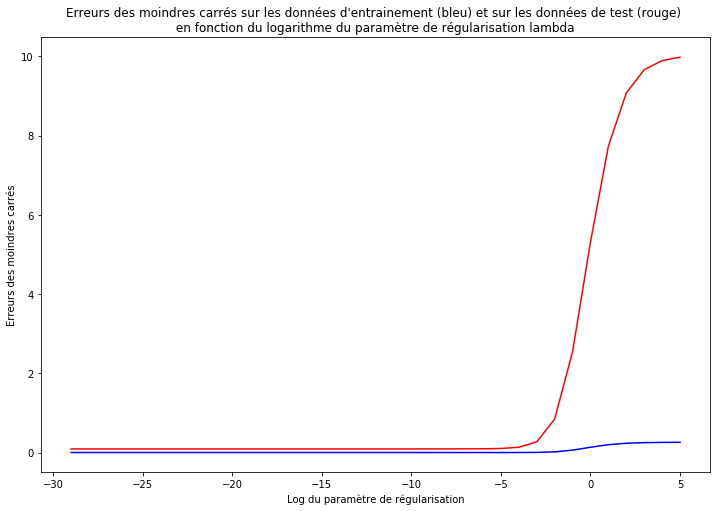

In [149]:
def question_32():
    a=[1,1,1]
    b=5
    w_th=np.array([b]+a)
    eps=1 #variance du bruit
    
    #Ensemble d'entrainement
    size_trainset=100 # >len(a)+1
    X_train, Y_train =gen_linear2(a,b,eps,size_trainset)
    #Ensemble de test
    size_testset=5
    X_test, Y_test =gen_linear2(a,b,eps,size_testset)

    #On calcule w pour différentes valeurs de lambda
    lbd=[math.exp(-k) for k in range(-5,30)] #recherche grossière
    mse_train=[] #erreur des moindres carrés sur donnees d'entrainement selon lambda
    mse_test=[] #erreur des moindres carrés sur données de test selon lambda    
    
    for l in lbd:
        w=ridge_regress(X_train,Y_train,l)
        mse_train.append(mse(Y_train,predict(w,X_train)))
        mse_test.append(mse(Y_test,predict(w,X_test)))
    
    plt.figure()
    plt.plot([math.log(l) for l in lbd],mse_train,color='b')
    plt.plot([math.log(l) for l in lbd],mse_test,color='r')
    plt.xlabel("Log du paramètre de régularisation")
    plt.ylabel("Erreurs des moindres carrés")
    plt.title("Erreurs des moindres carrés sur les données d'entrainement (bleu) et sur les données de test (rouge) \n en fonction du logarithme du paramètre de régularisation lambda ")
    plt.show()

question_32()


3.2. On trace ici les erreurs des moindres carrés sur les données d'entrainement et sur les données de test en fonction du paramètre de régularisation lambda (bruit de 1, 100 données d'entrainement). Le but est donc de choisir le lambda qui minimise l'erreur de test. Ici on observe que pour ces paramètres, la régularisation ne permet pas d'obtenir mieux qu'une régression linéaire simple.

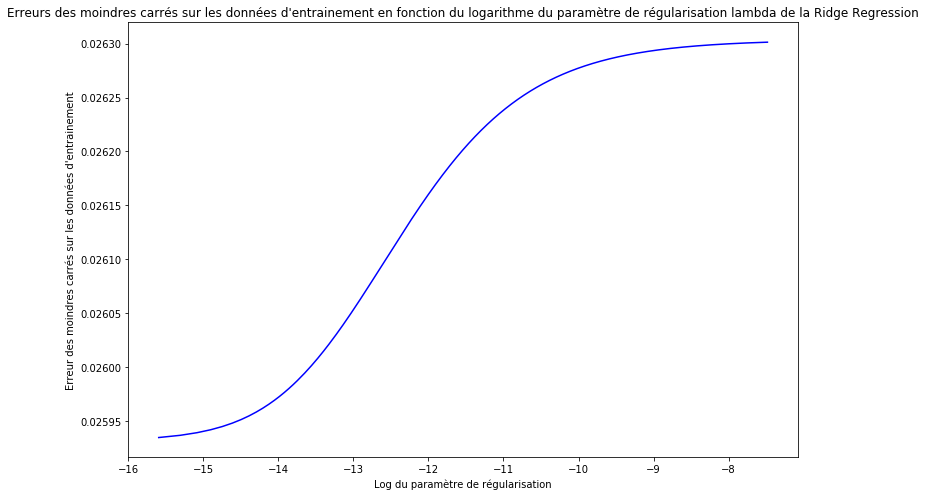

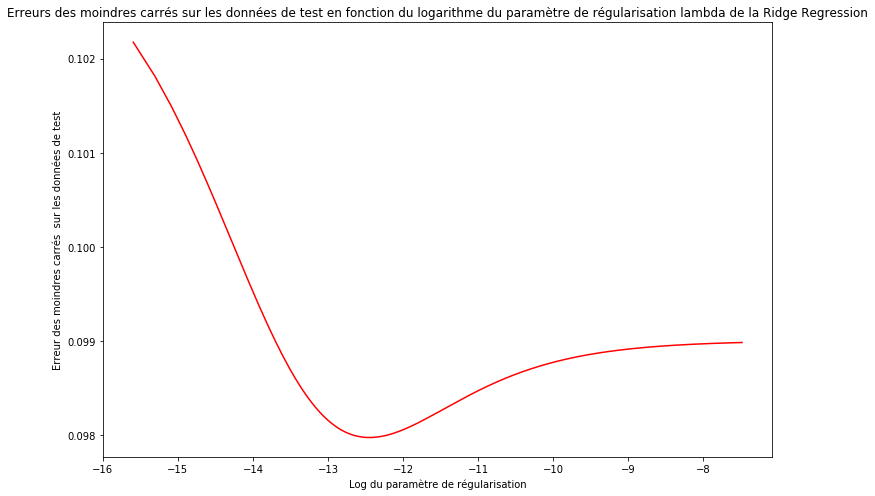

In [150]:
def question_33():
    X0,Y = read_file("housing.csv")
    lig,col=np.shape(X0)
    X=preprocess(X0)

    N=450 # >len(a)+1

    #On calcule w pour différentes valeurs de lambda
    #lbd=[math.exp(-k) for k in range(1,20)] #recherche grossière
    lbd=[math.exp(-16) + k*0.5*math.exp(-16) for k in range(1,pow(10,4))] #recherche plus fine
    mse_train=[] #erreur des moindres carrés sur donnees d'entrainement selon lambda
    mse_test=[] #erreur des moindres carrés sur données de test selon lambda    
    
    for l in lbd:
        w=ridge_regress(X[:N,:],Y[:N],l)
        mse_train.append(mse(Y[:N],predict(w,X[:N,:])))
        mse_test.append(mse(Y[N+1:],predict(w,X[N+1:,:])))
        
    plt.figure()
    plt.plot([math.log(l) for l in lbd],mse_train,color='b')
    plt.xlabel("Log du paramètre de régularisation")
    plt.ylabel("Erreur des moindres carrés sur les données d'entrainement")
    plt.title("Erreurs des moindres carrés sur les données d'entrainement en fonction du logarithme du paramètre de régularisation lambda de la Ridge Regression")
    plt.show()  
    plt.figure()
    plt.plot([math.log(l) for l in lbd],mse_test,color='r')
    plt.xlabel("Log du paramètre de régularisation")
    plt.ylabel("Erreur des moindres carrés  sur les données de test")
    plt.title("Erreurs des moindres carrés sur les données de test en fonction du logarithme du paramètre de régularisation lambda de la Ridge Regression")
    plt.show() 

question_33()

3.3. On trace de même les erreurs des moindres carrés sur les données d'entrainement et sur les données de test en fonction du paramètre de régularisation lambda pour un ensemble d'entrainement de taille 450 pour lequel on a en effet mis en évidence du surapprentissage (cf. question 2.3.3)

On observe que quand l'erreur d'entrainement ne fait qu'augmenter avec lambda (ce qui est logique puisque la pénalisation altère la performance sur l'ensemble d'apprentissage), l'erreur de test diminue jusqu'à lambda  environ égal à exp(-12,5) (la pénalisation diminue jusqu'à cette valeur de lambda la sensibilité trop importante de l'algorithme "au bruit" des données d'apprentisage) pour réaugmenter ensuite (une partie des données n'est alors plus modélisé du fait de la pénalisation trop importante). Par conséquent, cette valeur critique de lambda apparaît comme le meilleur choix pour régulariser la solution, si l'on travaille avec une telle taille d'ensemble d'apprentissage.

Avec une régression linéaire classique, l'erreur des moindres carrées sur les données de test pour 450 données d'apprentissage était de l'ordre de 0,13 (cf. affcihage question 2.3.3). Avec la ridge regression pour lambda minimisant l'erreur, l'erreur est de l'ordre de 0.098 comme on l'observe sur ce graphique. Par conséquent, la Ridge Regression améliore les résultats en luttant contre le sur-apprentissage.

# 4.LASSO

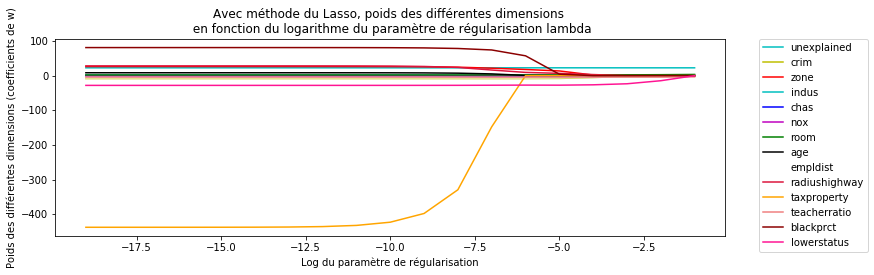

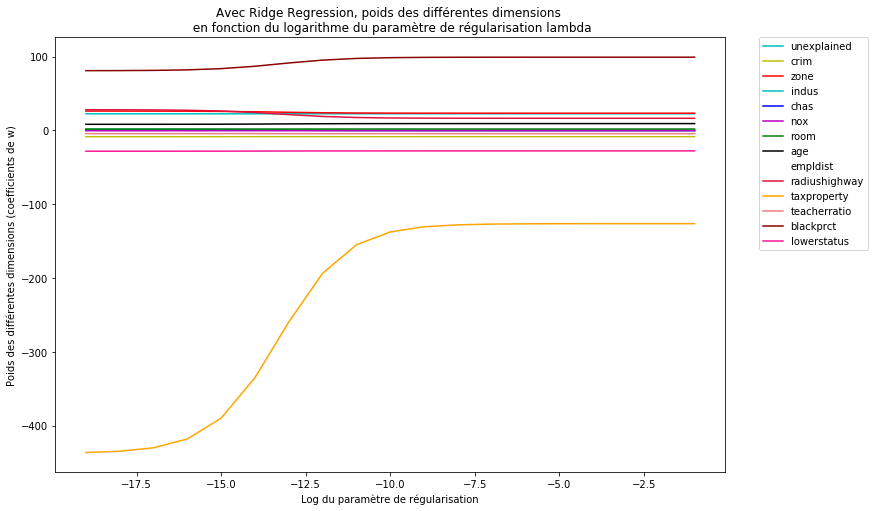

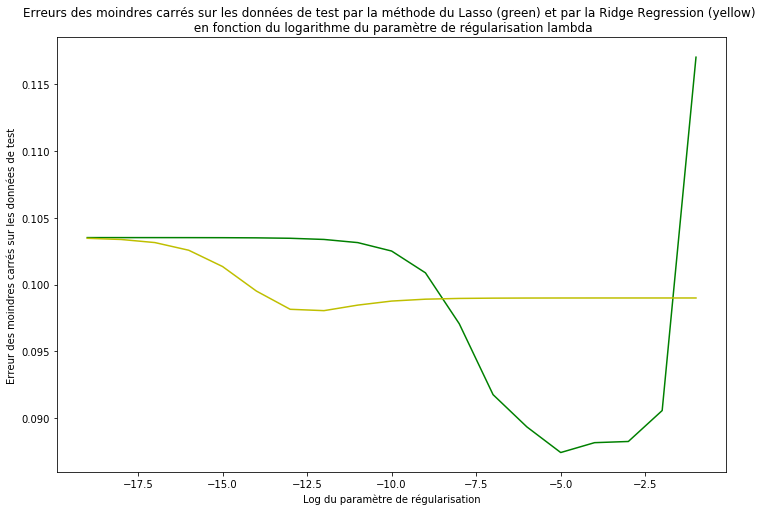

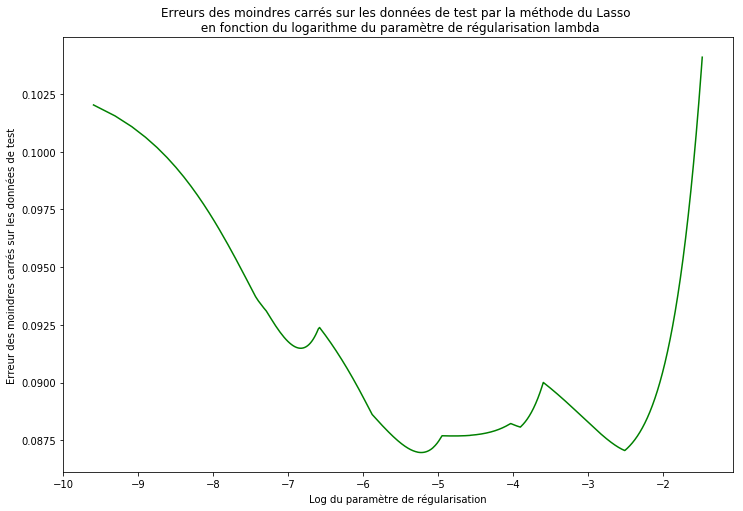

In [151]:
def question_41_42():        
    X,Y = read_file("housing.csv")
    lig,col=np.shape(X)
    X=preprocess(X)

    N=450 # >len(a)+1

    #On calcule w pour différentes valeurs de lambda
    lbd=[math.exp(-k) for k in range(1,20)]   
    w_Lasso_list=[] #composantes de w appris selon lambda
    mse_Lasso_train=[] #erreur des moindres carrés sur donnees d'entrainement selon lambda
    mse_Lasso_test=[] #erreur des moindres carrés sur données de test selon lambda  
    #Pour comparaison avec la Ridge Regression 
    w_Ridge_list=[] 
    mse_Ridge_test=[] #erreur des moindres carrés sur données de test selon lambda 

    #cpt=0
    for l in lbd:
        clf=skl.Lasso(alpha=l)
        clf.fit(X[:N,:],Y[:N])
        w_Lasso=np.concatenate((np.array([clf.intercept_]),clf.coef_),axis=0)

        mse_Lasso_train.append(mse(Y[:N],predict(w_Lasso,X[:N,:])))
        mse_Lasso_test.append(mse(Y[N+1:],predict(w_Lasso,X[N+1:,:])))
        w_Lasso_list.append(w_Lasso)

        #Pour comparaison avec la Ridge Regression
        w_Ridge=ridge_regress(X[:N,:],Y[:N],l)
        mse_Ridge_test.append(mse(Y[N+1:],predict(w_Ridge,X[N+1:,:])))
        w_Ridge_list.append(w_Ridge)
        
        #if cpt==0:
        #   print(w_Lasso)
        #cpt+=1
    
    colors=["c", "y", "r", "c", "b", "m", "g", "k", "w","crimson","orange","lightcoral","darkred","deeppink"]
    var=["unexplained","crim", "zone", "indus", "chas", "nox", "room", "age", "empldist","radiushighway", "taxproperty", "teacherratio", "blackprct", "lowerstatus"]
    plt.figure()
    plt.subplot(2,1,1)
    for k in range(col+1):
        plt.plot([math.log(l) for l in lbd],[w_Lasso_list[i][k] for i in range(len(w_Lasso_list))],color=colors[k],label=var[k])
    plt.xlabel("Log du paramètre de régularisation")
    plt.ylabel("Poids des différentes dimensions (coefficients de w)")    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Avec méthode du Lasso, poids des différentes dimensions \n en fonction du logarithme du paramètre de régularisation lambda")
    plt.show()
    
    plt.figure()
    for k in range(col+1):
        plt.plot([math.log(l) for l in lbd],[w_Ridge_list[i][k] for i in range(len(w_Lasso_list))],color=colors[k],label=var[k])
    plt.xlabel("Log du paramètre de régularisation")
    plt.ylabel("Poids des différentes dimensions (coefficients de w)")   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Avec Ridge Regression, poids des différentes dimensions \n en fonction du logarithme du paramètre de régularisation lambda")
    plt.show()  
        
    plt.figure()
    plt.plot([math.log(l) for l in lbd],mse_Lasso_test,color='g')
    plt.plot([math.log(l) for l in lbd],mse_Ridge_test,color='y')
    plt.xlabel("Log du paramètre de régularisation")
    plt.ylabel("Erreur des moindres carrés sur les données de test")
    plt.title("Erreurs des moindres carrés sur les données de test par la méthode du Lasso (green) et par la Ridge Regression (yellow) \n en fonction du logarithme du paramètre de régularisation lambda")
    plt.show()  
    
    #Affinenement de la courbe pour la méthode du Lasso dans la zone intéressante
    #On calcule w pour différentes valeurs de lambda
    lbd=[math.exp(-10) + k*0.5*math.exp(-10) for k in range(1,pow(10,4))]
    w_Lasso_list=[] #composantes de w appris selon lambda
    mse_Lasso_train=[] #erreur des moindres carrés sur donnees d'entrainement selon lambda
    mse_Lasso_test=[] #erreur des moindres carrés sur données de test selon lambda  

    #cpt=0
    for l in lbd:
        clf=skl.Lasso(alpha=l)
        clf.fit(X[:N,:],Y[:N])
        w_Lasso=np.concatenate((np.array([clf.intercept_]),clf.coef_),axis=0)

        mse_Lasso_train.append(mse(Y[:N],predict(w_Lasso,X[:N,:])))
        mse_Lasso_test.append(mse(Y[N+1:],predict(w_Lasso,X[N+1:,:])))
        w_Lasso_list.append(w_Lasso)
        
        
    plt.figure()
    plt.plot([math.log(l) for l in lbd],mse_Lasso_test,color='g')
    plt.xlabel("Log du paramètre de régularisation")
    plt.ylabel("Erreur des moindres carrés sur les données de test")
    plt.title("Erreurs des moindres carrés sur les données de test par la méthode du Lasso \n en fonction du logarithme du paramètre de régularisation lambda")
    plt.show()  


question_41_42()

4.1. et 4.2.

Contrairement à la Ridge Regression, la méthode du Lasso permet de bien discriminer les variables qui évoluent en fonction du paramètre de régularisation $\lambda$. On remarque que, pour un ensemble d'apprentissage de 450 données, les poids de certaines dimensions des données s'annulent rapidement quand le paramètre de régularisation augmente, et que les poids d'autres dimensions résistent plus longntemps à son augmentation :ce sont les dimensions 2,9,10,12 et 13 (zone radiushighway taxproperty blackprct lowerstatus). Ceci tend à signifier que l'influence des autres dimensions est principalement dû à du sur-apprentissage, et que les 5 dimensions citées ont une vraie influence sur le prix du logement moyen (correspondent bien aux observations de la regression simple après traitement des données).

Aussi on constate que, pour 450 données d'apprentissage, l'erreur minimale des moindres carrées sur les données de test obtenue par le Lasso est bien inférieure à celle obtenue par la Ridge Regression.
Cependant on constate aussi que pour le Lasso, la valeur de lambda qui minimise l'erreur des moindres carrées est atteinte de manière plus "piquée" que pour la Ridge Regression: si on augmente un peu trop lambda, l'erreur obtenue avec le Lasso augmente plus vite. 
Par conséquent, le Lasso apporte une meilleure performance en terme d'apprentissage, mais au prix d'une plus grande sensibilité vis-à-vis du paramètre de régularisation.

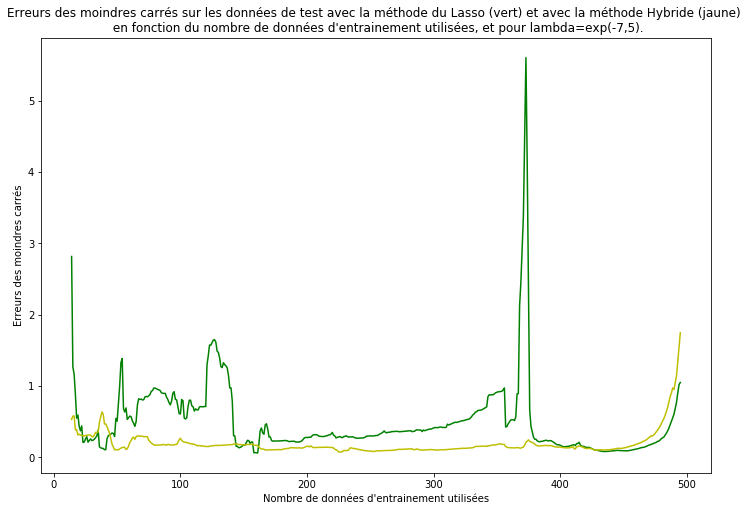

In [152]:
def question_43():
    #les variables [2,9,10,12,13] sont considérées comme influentes au vu du Lasso (cf.question 42) puisqu'atteignant le moins rapidement 0 avec le paramètre lambda
    #valeur de lambda pour laquelle les variables qui se n'annulent pas sont [2,9,10,12,13] (cf.question 42)
    l=math.exp(-7.5)  

    X,Y = read_file("housing.csv")
    lig,col=np.shape(X)
    X=preprocess(X)
    
    #On ne conserve que les variables influentes des données X
    X_Hybrid=np.concatenate((np.reshape(X[:,1],(lig,1)),np.reshape(X[:,8:10],(lig,2))),axis=1)
    X_Hybrid=np.concatenate((X_Hybrid,np.reshape(X[:,11:],(lig,2))),axis=1)

    #Erreurs des moindres carrés en fonction du nombre de données d'apprentissage
    size_train=list(range(col+1,lig-10)) #il faut au moins col+1 données d'apprentissage
    error_Lasso=[] #erreur des moindres carrées sur les données de test avec le Lasso 
    error_Hybrid=[]  #erreur des moindres carrées sur les données de test avec la méthode Hybride

    for N in size_train:
        #Lasso
        clf=skl.Lasso(alpha=l)
        clf.fit(X[:N,:],Y[:N])
        w_Lasso=np.concatenate((np.array([clf.intercept_]),clf.coef_),axis=0)
        error_Lasso.append(mse(Y[N+1:],predict(w_Lasso,X[N+1:,:])))

        #Méthode hybride
        w_Hybrid=regress(X_Hybrid[:N,:],Y[:N]) #w est de taille 6 (nombre de variables sélectionnées +1)
        error_Hybrid.append(mse(Y[N+1:],predict(w_Hybrid,X_Hybrid[N+1:,:]))) 

    plt.figure()
    plt.plot(size_train,error_Lasso,color='g')
    plt.plot(size_train,error_Hybrid,color='y')
    plt.xlabel("Nombre de données d'entrainement utilisées")
    plt.ylabel("Erreurs des moindres carrés")
    plt.title("Erreurs des moindres carrés sur les données de test avec la méthode du Lasso (vert) et avec la méthode Hybride (jaune) \n en fonction du nombre de données d'entrainement utilisées, et pour lambda=exp(-7,5).")
    plt.show()
    
question_43()

4.3. Si on opte pour une méthode hybride, c'est-à-dire pour appliquer une régression simple sur des données dont on ne garde que les dimensions influentes sélectionnées avec la méthode du Lasso (en l'occurrence les dimensions [2,9,10,12,13] qui ne s'annulent pas rapidement avec l'augmentation de $\lambda$), on obtient une erreur des moindres carrées plus faible que pour la méthode du lasso pour la même valeur de $\lambda$ et surtout moins fluctuante en fonction du nombre de données d'entrainement utilisées. En effet, cette sélection au préalable des dimensions influentes permet de lutter contre le bruit des autres dimensions des données d'entrainement et permet donc de lutter contre le sur-apprentissage possible.

# 5. Inpainting 

/home/deloro/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


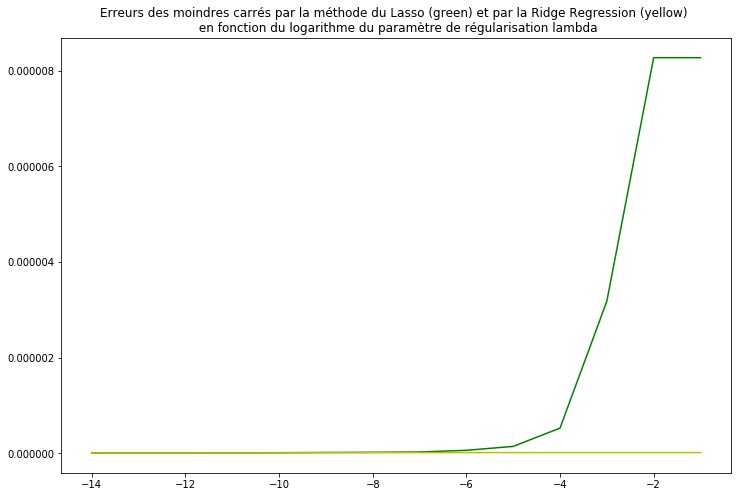

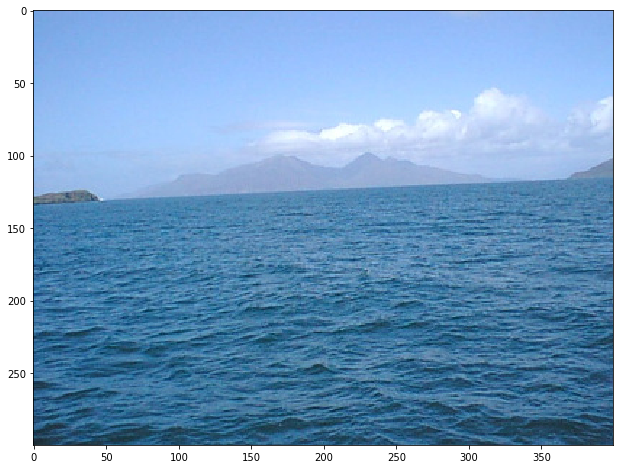

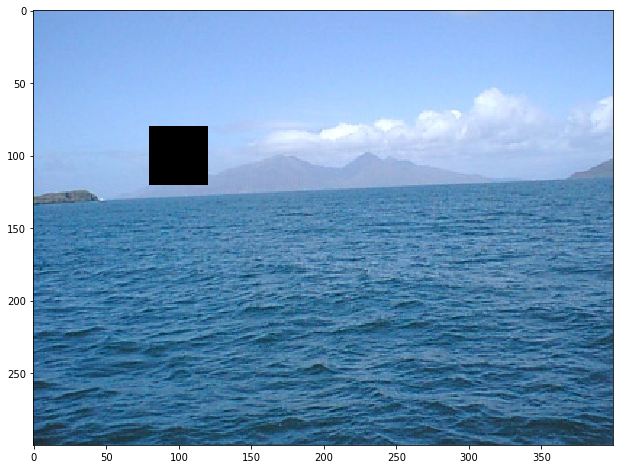

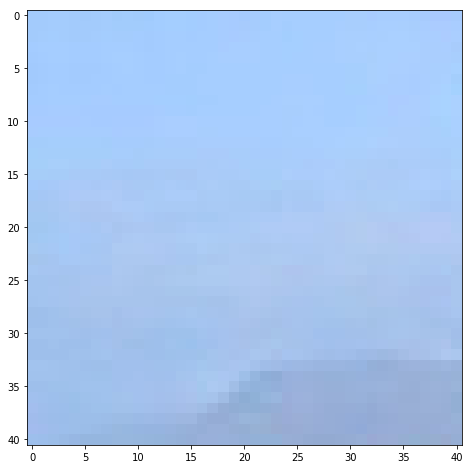

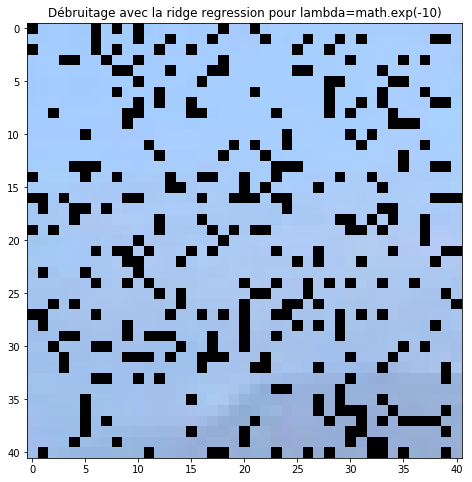

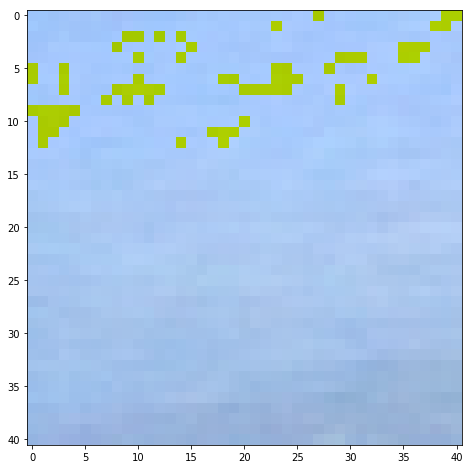

In [153]:
### Dimension du patch x-h:x+h,y-h:y+h
H = 20
### Valeur fictive pour les pixels absents
DEAD = -100
### Fichier image
IMG_FILE = "mer-small.jpg"

def build_dic(im,step=H):
    """ construction du dictionnaire : tous les patchs sans pixels morts en parcourant step by step l'image """
    res=[]
    step = step
    for i in range(0,im.shape[0],step):
        for j in range(0,im.shape[1],step):
            if inside(i,j,im) and np.sum(get_patch(i,j,im)[:,:,0]<=DEAD)==0:
                res.append(patch2X(get_patch(i,j,im)))
    return np.array(res).T

def patch2X(patch):
    """ transformation d'un patch en vecteur """
    return patch.reshape(-1)

def X2patch(X,h=H):
    """ transformation d'un vecteur en patch image"""
    return X.reshape(2*h+1,2*h+1,3)


def inside(i,j,im,h=H):
    """ test si un patch est valide dans l'image """
    return i-h >=0 and j-h >=0 and i+h+1<=im.shape[0] and j+h+1<=im.shape[1]

def get_patch(i,j,im,h=H):
    """ retourne un patch centre en i,j """
    return im[(i-h):(i+h+1),(j-h):(j+h+1)]

def remove_patch(i,j,im,h=H):
    """ Supprime le patch de l'image """
    imn= im.copy()
    imn[(i-h):(i+h+1),(j-h):(j+h+1)]=DEAD
    return imn,get_patch(i,j,im)

def noise_patch(patch,prc=0.2):
    """ Supprime des pixels aleatoirement """
    npatch = patch.copy().reshape(-1,3)
    height,width = patch.shape[:2]
    nb =int(prc*height*width)
    npatch[np.random.randint(0,height*width,nb),:]=DEAD
    return npatch.reshape(height,width,3)

def show(im,fig= None):
    """ affiche une image ou un patch """
    im = im.copy()
    if len(im.shape)==1 or im.shape[1]==1:
        im = X2patch(im)
    im[im<=DEAD]=-0.5
    if fig is None:
        plt.figure()
        fig = plt.imshow(hsv_to_rgb(im+0.5))
    fig.set_data(hsv_to_rgb(im+0.5))
    plt.draw()
    plt.pause(2)
    return fig

def read_img(img):
    """ lit un fichier image """
    im = plt.imread(img)
    if im.max()>200:
        im = im/255.
    return rgb_to_hsv(im[:,:,:3])-0.5

def compute_weights(patch,dic,meth,lmb):
    #Calcule les poids des différents patchs de pixels exprimés contenus dans dic, 
    #pour la reconstitution de patch, avec la méthode meth="lasso" ou "ridge" et le paramètre de régularisation lmb
    #Retourne le vecteur de poids et l'erreur d'entrainement (sur les pixels déjà exprimés du patch)
    dico=dic #patchs de pixels exprimés
    tab=patch2X(patch).flatten() #patch à reconstituer
    X=None 
    Y=[]
    cpt=0
    for i in range(np.shape(tab)[0]):
        if tab[i]>DEAD:   #on stocke dans Y les pixels exprimés du patch à reconstituer
           Y.append(tab[i])  
           cpt+=1
           add=np.reshape((dico[i,:]),(1,-1))
           if (cpt>1):# et dans X les patchs de pixels exprimés correspondant
              X=np.concatenate((X,add),axis=0)
           else:
              X=np.array(add)
              
    Y=np.array(Y)

    #on calcule les poids des patchs permettant la meilleure approximation des pixels déjà exprimés
    #du patch à reconstruire
    if meth=="lasso":
       clf=skl.Lasso(alpha=lmb) #paramètre lambda de régularisation
       clf.fit(X,Y)
       w=np.concatenate((np.array([clf.intercept_]),clf.coef_),axis=0)
       #w=np.concatenate((np.array([0]),clf.coef_),axis=0)
    elif meth=="ridge":
       w=ridge_regress(X,Y,lmb)
       #w=np.concatenate((np.array([0]),w[1:]),axis=0)
    else :
       print("Méthode non reconnue")
       return patch
    
    #calcul de l'erreur d'entrainement (sur les pixels déjà exprimés du patch)
    train_error=mse(Y,predict(w,X))
    return w,train_error

def denoise(patch,dic,meth,lmb):
    #renvoit le patch débruité avec la méthode meth="lambda" ou "ridge", pour le paramètre de régularisation lmb
    #à l'aide du dictionnaire de patchs exprimés dic
    w=compute_weights(patch,dic,meth,lmb)[0]
    X=dic
    Y_repainted=predict(w,X) #prédiction avec w
    patch_denoised=X2patch(Y_repainted)
    return patch_denoised

def question_51():
    img = read_img(IMG_FILE)
    patch = get_patch(100,100,img)
    noisy = noise_patch(patch)
    imgnew, oldpatch = remove_patch(100,100,img)

    dic=build_dic(imgnew)
    
    #Tracé des erreurs pour les deux méthodes selon le paramètre de régularisation
    lbd=[math.exp(-k) for k in range(1,15)] 
    mse_Lasso=[] #erreur des moindres carrés sur les pixels déjà exprimés selon lambda  
    mse_Ridge=[] #erreur des moindres carrés sur les pixels déjà exprimés selon lambda 
    for l in lbd:
        error_Lasso=compute_weights(noisy,dic,"lasso",l)[1]
        mse_Lasso.append(error_Lasso)

        error_Ridge=compute_weights(noisy,dic,"ridge",l)[1]
        mse_Ridge.append(error_Ridge)   
    plt.figure()
    plt.plot([math.log(l) for l in lbd],mse_Lasso,color='g')
    plt.plot([math.log(l) for l in lbd],mse_Ridge,color='y')
    plt.title("Erreurs des moindres carrés par la méthode du Lasso (green) et par la Ridge Regression (yellow) \n en fonction du logarithme du paramètre de régularisation lambda")
    plt.show()

    #Debruitage avec un bon paramètre de régularisation
    plt.ion()
    show(img)
    show(imgnew)
    show(oldpatch)
    show(noisy)
    patch_denoised=denoise(noisy,dic,"ridge",math.exp(-10))
    plt.title("Débruitage avec la ridge regression pour lambda=math.exp(-10)")
    show(patch_denoised)

question_51()

5.1. Afin de reconstruire un patch donné, on apprend le poids des différents patchs voisins en minimisant l'erreur avec les pixels déjà exprimés de notre patch.  On montre ci-dessous l'erreur des moindres carrés obtenues sur les données d'entrainement (pixels déjà exprimés) pour les deux méthodes : Ridge Regression et Lasso, sur une large plage de valeurs du paramètre de régularisation. On observe le résultat de l'inpainting pour la Ridge Regression et un paramètre $\lambda= exp(-10)$